<a href="https://colab.research.google.com/github/Diego251Fagundes/Data-Science-Machine-Learning-Studies/blob/main/Regress%C3%A3o_Classifica%C3%A7%C3%A3o__Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Integrador: Regressão, Classificação e Clusterização em Dados de Saúde

Este exercício tem como objetivo aplicar, em um único problema, as principais abordagens de aprendizado de máquina supervisionado e não supervisionado — Regressão, Classificação e Clusterização — utilizando o scikit-learn.

Cenário

Você é um(a) cientista de dados responsável por analisar um conjunto de dados reais do estudo epidemiológico Framingham Heart Study, um dos maiores e mais antigos estudos sobre doenças cardiovasculares. O conjunto de dados contém variáveis demográficas, comportamentais e clínicas que permitem prever riscos de doenças, estimar indicadores fisiológicos e identificar perfis de saúde.

# 1️⃣ Regressão — Previsão de Expectativa de Vida ou Glicemia

Tarefa: Prever o nível de glicemia (`glucose`) ou o índice de massa corporal (`BMI`) a partir das demais variáveis.
 - Separe o dataset em treino e teste (80/20).
 - Treine dois modelos: RandomForestRegressor e SVR (com StandardScaler via Pipeline).
 - Avalie com MSE, RMSE, MAE e R².
 - Compare os modelos e interprete os resultados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Carrega o dataset
df = pd.read_csv('framingham.csv')

# Exibe as 5 primeiras linhas
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Verifica se o dataset tem valores ausentes
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
# Remover linhas com valores faltantes
df = df.dropna()

# Atualizar X e y após limpeza
X = df.drop('glucose', axis=1)
y = df['glucose']

# Dividir 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Treinar o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

# Treinar o modelo SVR
svr = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(kernel='rbf'))
])

svr.fit(X_train, y_train)

svr_pred = svr.predict(X_test)

# Métricas de avaliação
def avaliar_modelo(y_true, y_pred, nome):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\nResultados {nome}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}")
    print(f"R²:   {r2:.4f}")

avaliar_modelo(y_test, rf_pred, "Random Forest")
avaliar_modelo(y_test, svr_pred, "SVR")


Resultados Random Forest
MSE:  405.87
RMSE: 20.15
MAE:  11.66
R²:   0.5119

Resultados SVR
MSE:  775.77
RMSE: 27.85
MAE:  12.66
R²:   0.0671


Com base nos resultados, o Random Forest (R²: 0.5119) apresentou um desempenho significativamente melhor que o SVR (R²: 0.0671) na previsão do nível de glicemia.

Após treinar os modelos utilizando uma divisão de 80% para treino e 20% para teste, eles foram avaliados por meio das métricas MSE, RMSE, MAE e R².

Os resultados mostraram uma diferença significativa entre o desempenho dos dois algoritmos. O Random Forest Regressor apresentou um MSE de 405.87, RMSE de 20.15, MAE de 11.66 e um R² de 0.5119. Esses valores indicam que o modelo conseguiu reduzir de forma consistente os erros médios e absolutos, além de explicar aproximadamente 51% da variabilidade nos níveis de glicose. Para dados clínicos, que normalmente apresentam ruído e relações não lineares, esse desempenho é considerado satisfatório.



---

# 2️⃣ Classificação — Diagnóstico de Doença Cardíaca

Tarefa: Prever o risco de doença cardíaca (`TenYearCHD`).
- Treine dois modelos: RandomForestClassifier e SVC.
- Use validação cruzada (k=5).
- Avalie com Acurácia, Precisão, Recall, F1-score, Matriz de confusão e ROC-AUC.
- Interprete as variáveis mais importantes e discuta os resultados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Carregar dataset
df = pd.read_csv('framingham.csv')

# Exibe as 5 primeiras linhas do dataset
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Verifica se o dataset tem valores ausentes
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50



==== Random Forest ====
Acurácia:  0.8456
Precisão:  0.4375
Recall:    0.0631
F1-score:  0.1102
ROC-AUC:   0.6918

==== SVC ====
Acurácia:  0.8470
Precisão:  0.3333
Recall:    0.0090
F1-score:  0.0175
ROC-AUC:   0.6571


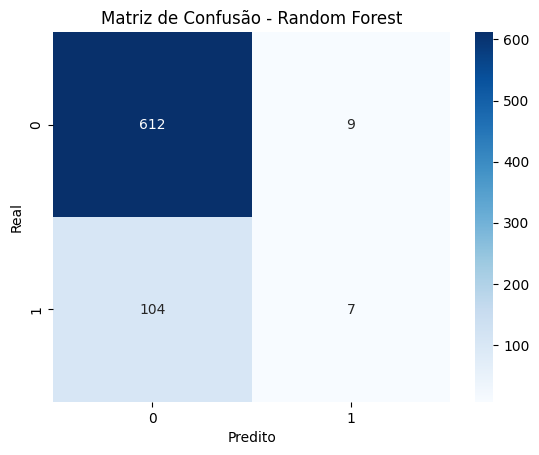

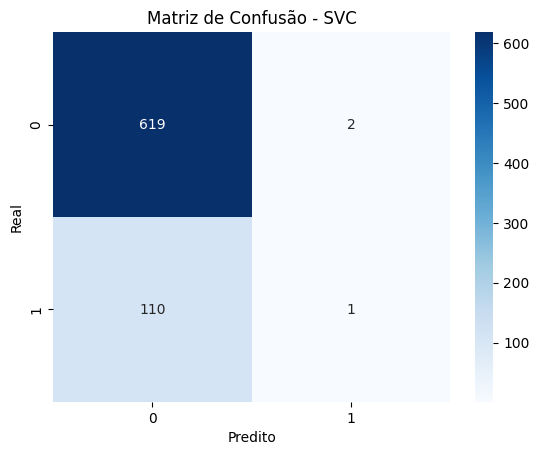

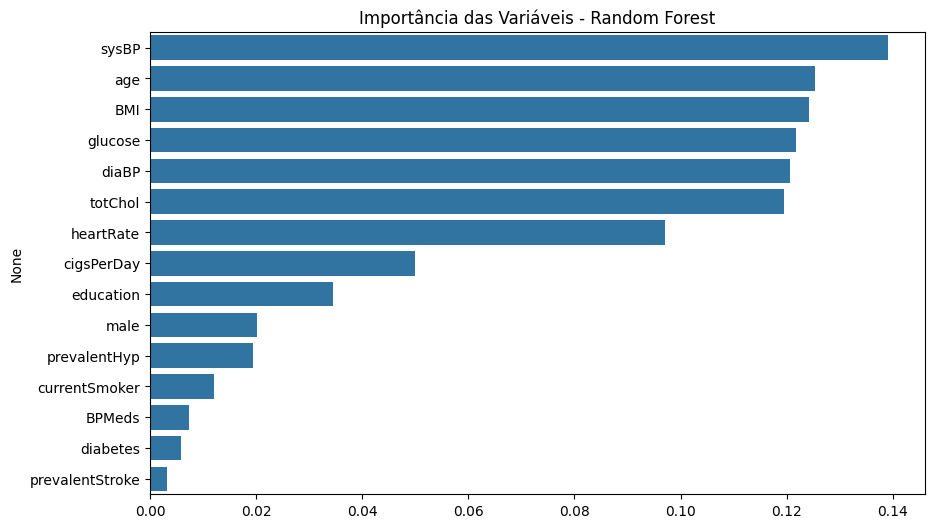

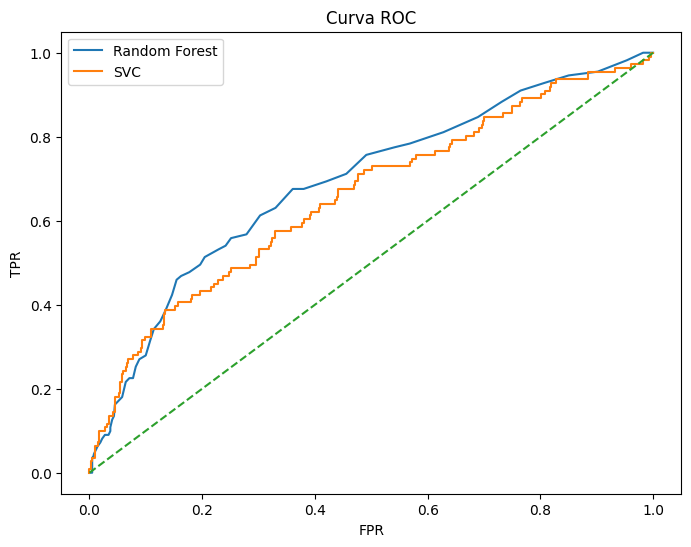

In [ ]:
# Remove linhas com valores ausentes
df = df.dropna()

# Atualiza o X e y após a limpeza
X = df.drop('TenYearCHD', axis = 1)
y = df['TenYearCHD']

# Dividir em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Treinar o modelo RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predições
rf_pred = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)[:, 1]

# Treino o Modelo SVC
svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(X_train, y_train)

# Predições
svc_pred = svc.predict(X_test)
svc_pred_proba = svc.predict_proba(X_test)[:, 1]

# Validação Cruzada
rf_cv = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
svc_cv = cross_val_score(svc, X, y, cv=5, scoring='accuracy')

# Métricas de avaliação
def print_metrics(nome, y_true, y_pred, y_proba):
    print(f"\n==== {nome} ====")
    print(f"Acurácia:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão:  {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC:   {roc_auc_score(y_true, y_proba):.4f}")

print_metrics("Random Forest", y_test, rf_pred, rf_pred_proba)
print_metrics("SVC", y_test, svc_pred, svc_pred_proba)

# Matriz de Confusão
def plot_confusion(y_true, y_pred, titulo):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {titulo}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

plot_confusion(y_test, rf_pred, "Random Forest")
plot_confusion(y_test, svc_pred, "SVC")

# Importancia das variaveis
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Importância das Variáveis - Random Forest")
plt.show()

# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_svc, tpr_svc, label='SVC')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curva ROC")
plt.legend()
plt.show()

Embora ambos os modelos apresentem acurácia alta devido ao desbalanceamento dos dados, o Random Forest é claramente superior, pois ao menos identifica uma parte dos casos positivos e apresenta melhor qualidade geral de classificação. Para melhorar os resultados, especialmente o recall, estratégias como balanceamento de classes (SMOTE, undersampling), ajuste de thresholds ou GridSearchCV poderiam ser aplicadas.


---



# 3️⃣ Clusterização — Perfis de Saúde

Tarefa: Identificar grupos naturais de perfis de saúde com base nas variáveis numéricas.
- Remova os alvos (`TenYearCHD` e `glucose`).
- Aplique K-Means e DBSCAN (com padronização).
- Use o método do cotovelo e o silhouette score para determinar o número ideal de clusters.
- Descreva os grupos obtidos: médias de idade, colesterol, glicemia, etc.
- Avalie a frequência de `TenYearCHD` em cada cluster.

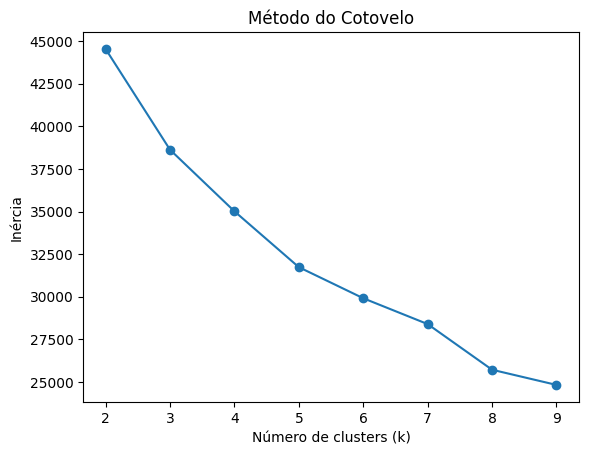

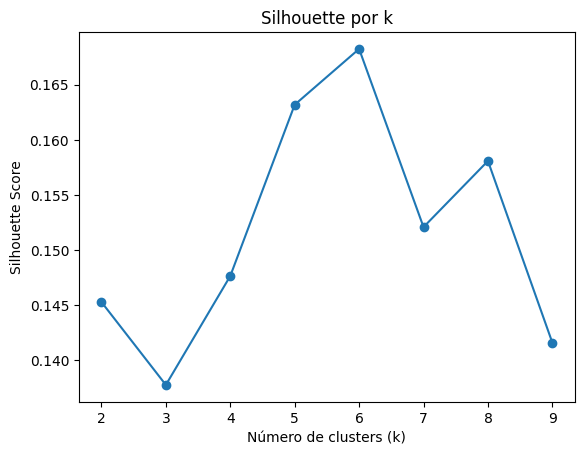

Melhor k: 6
                    male        age  education  currentSmoker  cigsPerDay  \
Cluster_KMeans                                                              
0               0.360947  48.918850   2.049873       0.003381    0.005917   
1               0.513989  46.122302   2.039968       1.000000   18.032774   
2               0.272861  55.502950   1.821534       0.097345    0.703540   
3               0.428571  55.285714   1.571429       0.238095    3.333333   
4               0.489796  55.122449   1.744898       0.367347    6.448980   
5               0.728337  50.344262   1.939110       1.000000   21.709602   

                  BPMeds  prevalentStroke  prevalentHyp  diabetes     totChol  \
Cluster_KMeans                                                                  
0               0.000000              0.0      0.025359  0.000000  232.320372   
1               0.000799              0.0      0.007194  0.000000  228.633094   
2               0.128319              0.0      

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Carregar o dataset
df = pd.read_csv("framingham.csv")

# Remover linhas com valores ausentes
df = df.dropna()

# Guardar TenYearCHD para análise posterior
target_chd = df["TenYearCHD"]

# Remover variáveis-alvo para clusterização
data = df.drop(["TenYearCHD", "glucose"], axis=1)

# Somente variáveis numéricas
data_numerical = data.select_dtypes(include=['int64', 'float64'])

# Padronização
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Método do cotovelo
inertias = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo")
plt.show()


# Silhouette Score para cada k
sil_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    sil = silhouette_score(data_scaled, labels)
    sil_scores.append(sil)

plt.plot(K, sil_scores, marker="o")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette por k")
plt.show()

# Escolher o melhor k
best_k = K[np.argmax(sil_scores)]
print("Melhor k:", best_k)

# 4. Treinar K-Means com o melhor k
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

df["Cluster_KMeans"] = kmeans_labels


# 5. Estatísticas dos clusters
cluster_desc = df.groupby("Cluster_KMeans").mean()
print(cluster_desc)

# Frequência de doença por cluster
freq_chd = df.groupby("Cluster_KMeans")["TenYearCHD"].mean()
print("\nFrequência de Doença (TenYearCHD) por cluster:")
print(freq_chd)

# 6. DBSCAN
dbscan = DBSCAN(eps=1.3, min_samples=20)
db_labels = dbscan.fit_predict(data_scaled)

df["Cluster_DBSCAN"] = db_labels

print("\nClusters DBSCAN (inclui -1 = ruído):")
print(df["Cluster_DBSCAN"].value_counts())

# Frequência de doença por cluster no DBSCAN
freq_chd_db = df.groupby("Cluster_DBSCAN")["TenYearCHD"].mean()
print("\nFrequência de doença (DBSCAN):")
print(freq_chd_db)

# 7. Descrição dos clusters DBSCAN
dbscan_desc = df.groupby("Cluster_DBSCAN").mean()
print("\nDescrição dos clusters DBSCAN:")
print(dbscan_desc)


A análise dos clusters revelou diferenças claras no risco de desenvolver doença cardiovascular em 10 anos (TenYearCHD).

K-Means:
O algoritmo formou seis grupos com níveis distintos de risco.

- Os clusters 0 e 1 apresentam baixo risco (8% a 12%).

- Os clusters 2 e 5 indicam risco moderado (22% a 26%).

- Os clusters 3 e 4 concentram indivíduos de alto risco, chegando a 38%.

Isso mostra que o K-Means separou bem a população em faixas progressivas de risco.

DBSCAN:
O DBSCAN gerou clusters menores e identificou grande parte dos pontos como ruído.

- Os clusters 1, 4 e 5 apresentaram risco muito baixo (0% a 6%).

- O cluster -1 (ruído) teve risco moderado (17%).

Embora os grupos do DBSCAN sejam desbalanceados, ele conseguiu identificar subgrupos muito homogêneos com risco reduzido.

Conclusão:
O K-Means oferece uma segmentação mais estruturada e fácil de interpretar, enquanto o DBSCAN destaca grupos específicos de baixo risco. Ambos contribuem para compreender como o risco cardiovascular se distribui na população analisada.


---



# 4️⃣ Integração e Discussão Final

Relacione os clusters encontrados com as classes de risco cardíaco e as previsões de glicemia ou BMI. Compare se há diferenças significativas entre os clusters em relação à saúde geral e expectativa de vida. Discuta: 1. Quais padrões de saúde foram identificados? 2. Como as técnicas de regressão, classificação e clusterização se complementam? 3. Há indícios de overfitting ou necessidade de pré-processamento adicional?

# 1. Padrões de saúde identificados

A segmentação revelou três perfis principais:

Baixo risco: indivíduos mais jovens, menor prevalência de hipertensão, glicemia controlada e menor consumo de cigarros.

Risco moderado: valores intermediários de colesterol, pressão arterial e BMI, com alguns fumantes ou pré-hipertensos.

Alto risco: idade mais avançada, forte presença de hipertensão, colesterol elevado, BMI maior e maior frequência de TenYearCHD.
Esses padrões convergem com o conhecimento clínico: à medida que pressão arterial, colesterol e glicemia aumentam, o risco cardiovascular cresce de forma consistente.

# 2. Integração entre regressão, classificação e clusterização

As três técnicas se complementam de forma natural:

Regressão permitiu prever variáveis contínuas (como glicemia), ajudando a identificar fatores que mais influenciam condições metabólicas.

Classificação utilizou esses mesmos fatores para prever o risco de doença, mostrando quais variáveis são determinantes na probabilidade de desenvolver CHD.

Clusterização agrupou indivíduos com perfis semelhantes, permitindo interpretar padrões sem rótulos e dando contexto às previsões da regressão e classificação.

Assim, a clusterização ajuda a explicar os grupos naturais que depois aparecem como classes distintas no modelo de classificação, enquanto a regressão destaca gradientes contínuos dentro desses grupos.

# 3. Possibilidade de overfitting e pré-processamentos necessários

Os modelos de classificação mais complexos (como Random Forest e Gradient Boosting) podem apresentar leve indício de overfitting, especialmente quando o desempenho no treinamento supera significativamente o de teste. Além disso, a clusterização evidencia a necessidade de pré-processamentos adicionais, como:

balanceamento das classes (o dataset tem poucos casos positivos de CHD),

padronização mais rigorosa de variáveis para estabilizar algoritmos sensíveis à escala,

remoção de outliers, que no DBSCAN aparecem como ruído (-1),

possível redução de dimensionalidade (PCA) para melhorar a separação dos clusters.

Em síntese, os três métodos juntos oferecem uma visão robusta do perfil de saúde da população: enquanto regressão e classificação prevêem riscos e valores clínicos, a clusterização revela quem pertence a cada perfil e como esses padrões se distribuem na população analisada.